### Impact of varying ${\alpha}$ in Simple Exponential Smoothing on rmse value of airline passengers data
### refer HOLT WINTERS METHOD Notebook for all the references.
### Author
- SHASHWAT VAIBHAV

In [1]:
## Let's import 
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = r'Data/airline_passengers.csv'

df = pd.read_csv(path, index_col='Month', parse_dates=True)

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


${Y(t+1) = \alpha * Y(t) + \alpha*(1- \alpha )* Y(t-1) + \alpha* (1 - \alpha)^2 * Y(t-2) +...}$

In [5]:
df.index.freq = 'MS'

In [30]:
#create a generic function

def findSES(df, window, alpha):
    pred_list = list()
    
    pred_val = 0
    ## Till window size, predicted value is same as the ground truth
    for loc in np.arange(0, window):
        temp = df.iloc[loc].values[0]
        pred_val = (1-alpha)*pred_val + alpha*temp
        pred_list.append(temp)
    
    for loc in np.arange(window, len(df)):
        temp = df.iloc[loc-1].values[0]
        pred_val = alpha*temp + (1-alpha)*(pred_list[len(pred_list)-1])
        pred_list.append(pred_val)
        
    return pred_list
    

In [41]:
## Let's get the forecasted values from findSES with alpha = 0.5

forecast_list = findSES(df, 12, 0.5)
df['alpha_0.5'] = forecast_list

<AxesSubplot:xlabel='Month'>

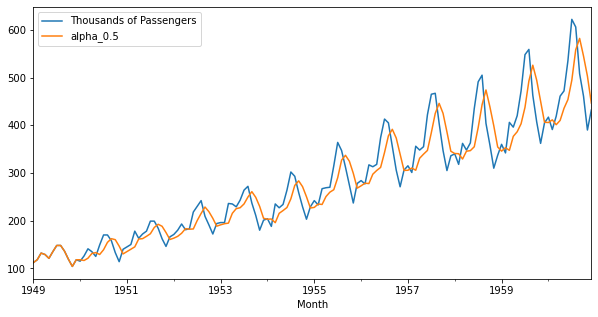

In [43]:
df.plot(figsize=(10,5))

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse  = mean_squared_error(df['Thousands of Passengers'], df['alpha_0.5'])
rmse = np.sqrt(mse)
mae  = mean_absolute_error(df['Thousands of Passengers'], df['alpha_0.5'])
print(f'With alpha as 0.5, RMSE = {rmse}, MAE = {mae}')

##Why both rmse and mae?? Thankful to my friend who pointed out the need to do so, during our project
## on stock market data. 
## Also her advice on selecting metrics before visualizing the results/plots [which I always forget]

With alpha as 0.5, RMSE = 41.4168982963216, MAE = 29.962555547820948


### Let's see the results for ${\alpha}$ = 0.7, 0.8

In [56]:

forecast_list_7 = findSES(df, 12, 0.7)
df['alpha_0.7'] = forecast_list_7
## You can visualize the plots yourselves
### We are more concerned with results of error for now

In [55]:
mse_dot7  = mean_squared_error(df['Thousands of Passengers'], df['alpha_0.7'])
rmse_dot7 = np.sqrt(mse_dot7)
mae_dot7  = mean_absolute_error(df['Thousands of Passengers'], df['alpha_0.7'])
print(f'With alpha as 0.7, RMSE = {rmse_dot7}, MAE = {mae_dot7}')

With alpha as 0.7, RMSE = 37.556827823027064, MAE = 27.521553609878946


In [61]:
orecast_list_8 = findSES(df, 12, 0.8)
df['alpha_0.8'] = forecast_list_7
mse_dot8  = mean_squared_error(df['Thousands of Passengers'], df['alpha_0.8'])
rmse_dot8 = np.sqrt(mse_dot8)
mae_dot8  = mean_absolute_error(df['Thousands of Passengers'], df['alpha_0.8'])
print(f'With alpha as 0.8, RMSE = {rmse_dot8}, MAE = {mae_dot8}')

With alpha as 0.8, RMSE = 37.556827823027064, MAE = 27.521553609878946


<AxesSubplot:xlabel='Month'>

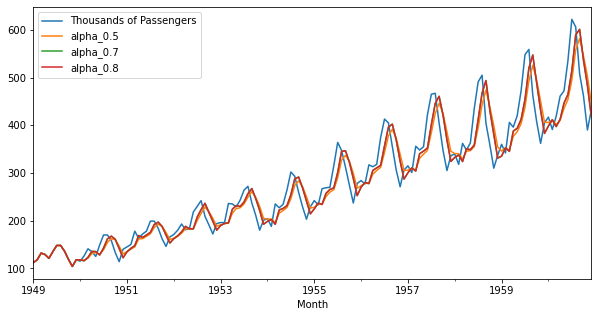

In [65]:
## Let's plot everything found till now
df.plot(figsize = (10,5))

<AxesSubplot:xlabel='Month'>

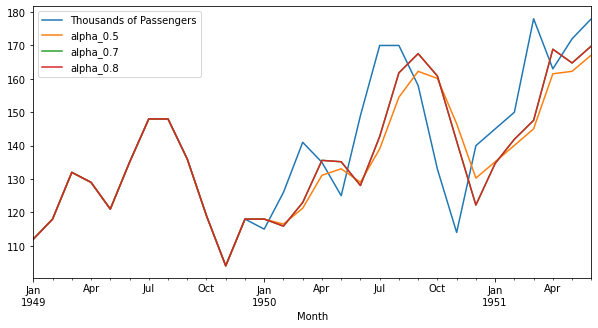

In [70]:
## First few values
df.iloc[:30].plot(figsize = (10,5))

<AxesSubplot:xlabel='Month'>

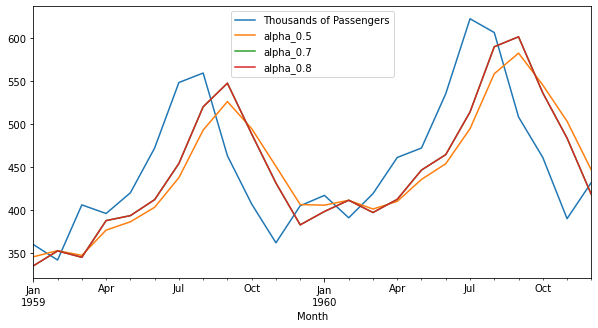

In [73]:
## Last few values
df.iloc[120:].plot(figsize=(10,5))

### Let's create a generic function
### What does it do?
- ### gives rmse, mae for different values of alpha

In [75]:
##Let's reload the data
DF = pd.read_csv(path, index_col='Month', parse_dates=True)
DF.index.freq = 'MS'

In [76]:
def provide_errors_please(df, window, steps, alpha_init):
    
    alpha = alpha_init ## initial value for alpha
    rmse_list  =[]
    mae_list   =[]
    alpha_list =[]
    
    while(alpha <=1.0):
        pred_list = findSES(df, window, alpha)
        mse = mean_squared_error(df["Thousands of Passengers"], pred_list)
        mae = mean_absolute_error(df["Thousands of Passengers"], pred_list)
        
        rmse_list.append(np.sqrt(mse))
        mae_list.append(mae)
        alpha_list.append(alpha)
        
        alpha = alpha + steps ##steps  of increment
    
    return rmse_list, mae_list, alpha_list
        

In [77]:
## let's get these values

rmse_list, mae_list, alpha_list = provide_errors_please(DF, 12, 0.05, 0.1)

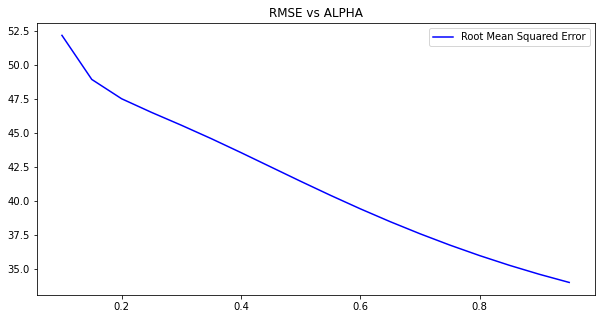

In [85]:
plt.figure(figsize = (10,5))
plt.plot(alpha_list, rmse_list, 'blue', label ='Root Mean Squared Error' )
plt.title('RMSE vs ALPHA')
plt.legend()

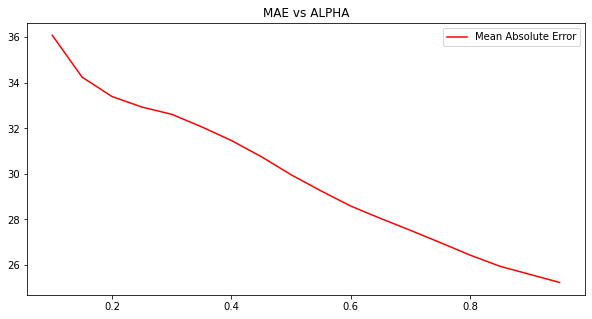

In [82]:
plt.figure(figsize = (10,5))
plt.plot(alpha_list, mae_list,'red', label = 'Mean Absolute Error')
plt.title('MAE vs ALPHA')
plt.legend()

### Conclusion
- #### The more you give weightage to the recent values, the more accurate is the forecast
- #### Is it correct? what do you think?? (you can mail me at - vaibhavshashwat@gmail.com)